<a href="https://colab.research.google.com/github/Miladatasys/2022-CODES/blob/master/Introducci%C3%B3n_a_Pandas_2025_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento del Dataset Titanic

En este tutorial veremos paso a paso por un **preprocesamiento completo** del famoso conjunto de datos del Titanic, considerando las prácticas habituales de **Machine Learning**. Verás cómo se manejan datos faltantes, cómo se eliminan columnas irrelevantes y cómo se realiza la **codificación** de variables categóricas.

El **objetivo** de este cuaderno es obtener un DataFrame final **listo para entrenar** un modelo de ML, asegurándonos de:
1. **Eliminar** columnas con demasiados valores faltantes o que no aportan.
2. **Imputar** valores faltantes en columnas relevantes.
3. **Codificar** columnas categóricas con one-hot encoding (variables dummies).
4. **Dividir** los datos en conjunto de entrenamiento y prueba.

## 1. Importar Librerías
Comenzamos importando las librerías fundamentales para el análisis y el preprocesamiento.

In [ ]:
import pandas as pd  # Manipulación de datos
import numpy as np   # Operaciones numéricas
import matplotlib.pyplot as plt  # Visualización
from sklearn.model_selection import train_test_split  # Para dividir en train/test

## 2. Cargar Datos del Titanic
Leemos el archivo CSV desde un **URL** confiable y exploramos sus primeras filas.

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

titanic_df = pd.read_csv(
    url,
    sep=',',        # Separador CSV
    header='infer', # Fila con nombres de columnas
    encoding='latin1'
)

titanic_df.head(5)  # Mostramos las 5 primeras filas para inspeccionar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploración Inicial
Antes de procesar, conviene revisar la estructura y características del DataFrame.

In [ ]:
# Observamos el total de filas, columnas y tipos de datos
titanic_df.info()

# Resumen estadístico de columnas numéricas
titanic_df.describe(include='all')  # 'all' para ver info de columnas categóricas también

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3.1. Detección de Valores Faltantes
Para comprender dónde necesitamos imputar o eliminar datos, revisamos cuántos nulos existen por columna.

In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Limpieza Inicial
Crearemos una copia de nuestro DataFrame original para efectuar las operaciones de limpieza.

In [ ]:
# Copiamos el DataFrame para no alterar el original
df_clean = titanic_df.copy()

# Verificamos dimensiones antes de iniciar
print("Dimensiones iniciales:", df_clean.shape)

Dimensiones iniciales: (891, 12)


### 4.1. Columna 'Cabin'
La columna *Cabin* tiene demasiados datos faltantes (más del 70%). Generalmente, se **elimina** esta columna al no tener un criterio claro de imputación y presentar alta carencia de datos.

In [ ]:
# Eliminamos la columna 'Cabin' al presentar demasiados NaN
df_clean.drop('Cabin', axis=1, inplace=True)
df_clean.shape

(891, 11)

### 4.2. Columna 'Age'
Para la variable *Age*, no queremos perder muchas filas, así que **reemplazamos** valores nulos con una métrica central. Suele emplearse **mediana** por robustez ante atípicos.

In [ ]:
# Imputamos la mediana en los valores faltantes de Age
median_age = df_clean['Age'].median()
df_clean['Age'].fillna(median_age, inplace=True)

# Revisamos si aún hay nulos en 'Age'
df_clean['Age'].isna().sum()

/var/folders/bx/y_4x8pcn1_z23t_04h7d6ych0000gn/T/ipykernel_55224/2044032908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(median_age, inplace=True)


np.int64(0)

### 4.3. Columna 'Embarked'
La columna *Embarked* tiene algunos valores faltantes (no tan numerosos). Para la mayoría de los casos, es razonable:
- Imputar con la **moda** (valor más frecuente) en `Embarked`.
  
Esto garantiza que no descartemos filas valiosas y mantengamos la consistencia de la columna.

In [ ]:
# Calculamos la moda (valor más frecuente) de Embarked
mode_embarked = df_clean['Embarked'].mode()[0]  # mode() devuelve serie, tomamos la primera

# Reemplazamos nulos en 'Embarked' por la moda
df_clean['Embarked'].fillna(mode_embarked, inplace=True)

# Verificamos si hay valores nulos ahora
df_clean['Embarked'].isna().sum()

/var/folders/bx/y_4x8pcn1_z23t_04h7d6ych0000gn/T/ipykernel_55224/665718068.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Embarked'].fillna(mode_embarked, inplace=True)


np.int64(0)

## 5. Exploración y Visualización de Variables Relevantes
Para ilustrar la distribución y relaciones en nuestro dataset limpio, realizaremos algunas gráficas.

### 5.1. Histograma de la columna 'Age'

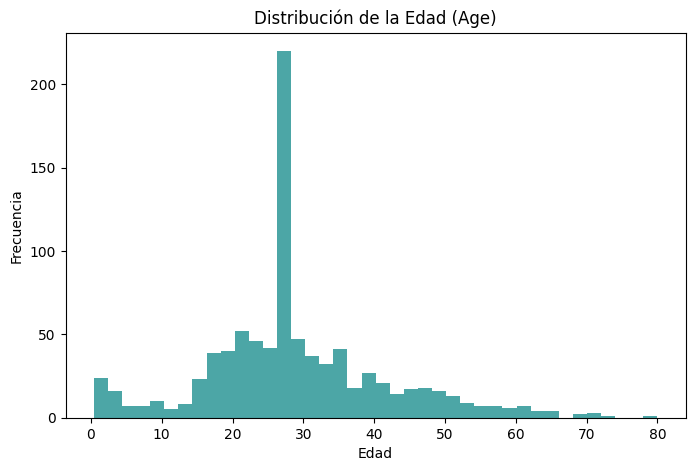

In [ ]:
df_clean['Age'].plot(kind='hist', bins=40, color='teal', alpha=0.7, figsize=(8,5))
plt.title('Distribución de la Edad (Age)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### 5.2. Boxplot de Edad por Clase (Pclass)

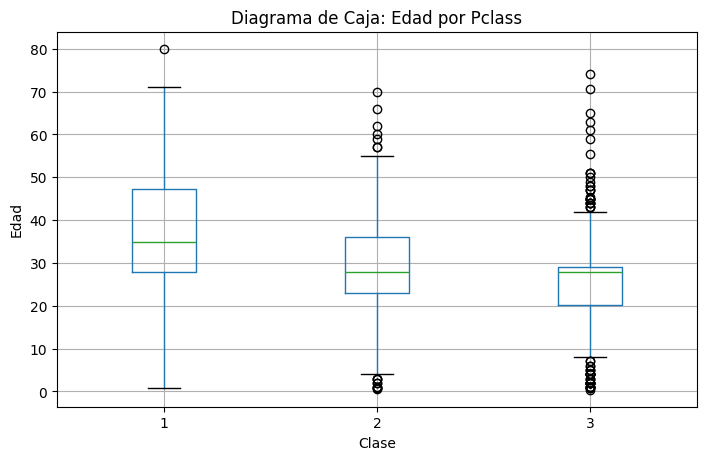

In [ ]:
df_clean.boxplot(column='Age', by='Pclass', figsize=(8,5))
plt.title('Diagrama de Caja: Edad por Pclass')
plt.suptitle('')  # Eliminamos título extra
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

### 5.3. Conteo de valores en 'Embarked'
Veamos la distribución final de *Embarked* tras la imputación.

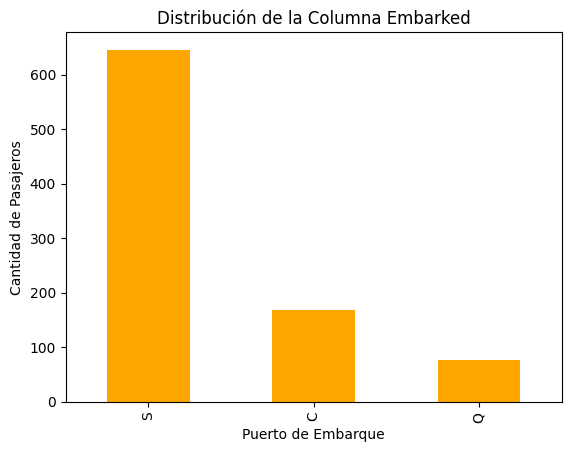

In [ ]:
df_clean['Embarked'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribución de la Columna Embarked')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

## 6. Eliminación de Columnas Irrelevantes
Para **modelar** la supervivencia, no nos aportan información útil:
- **PassengerId**: es sólo un identificador.
- **Name**: aunque podría usarse en un análisis detallado (por ejemplo, títulos de nobleza), suele eliminarse en un pipeline sencillo.
- **Ticket**: típicamente no aporta señal y tiene muchos valores únicos.

Removeremos esas columnas.

In [ ]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket']
df_clean.drop(cols_to_drop, axis=1, inplace=True)
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## 7. Codificar Variables Categóricas
Los modelos de ML suelen requerir datos numéricos. En el Titanic, las columnas **Sex** y **Embarked** son categóricas, así que aplicaremos **One-Hot Encoding**.

In [ ]:
# One-hot encoding para 'Sex' y 'Embarked'
df_encoded = pd.get_dummies(
    df_clean,
    columns=['Sex', 'Embarked'],
    drop_first=True  # Evita la multicolinealidad y hace 'n-1' columnas
)
df_encoded.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Observa que ahora tenemos columnas como `Sex_male` (si `drop_first=False` tendríamos también `Sex_female`) y `Embarked_Q`, `Embarked_S` etc. Esto hace que nuestras variables categóricas se conviertan en numéricas.

## 8. Dividir en Entrenamiento y Prueba
Para la parte de Machine Learning, se acostumbra separar las **features** (`X`) de la etiqueta objetivo (`y`). En este caso, la columna objetivo es **Survived**.

In [ ]:
# Separamos la variable objetivo y las predictoras
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

# Dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # Reproductibilidad
)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test :", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test :", y_test.shape)

Dimensiones de X_train: (712, 8)
Dimensiones de X_test : (179, 8)
Dimensiones de y_train: (712,)
Dimensiones de y_test : (179,)


# 9. Conclusión
A lo largo de este cuaderno hemos visto:
1. **Carga y exploración** inicial de datos (columnas, tipos, nulos, etc.).
2. **Manejo exhaustivo de valores faltantes**:
   - Eliminación de *Cabin* por alta proporción de nulos.
   - Imputación de *Age* (mediana).
   - Imputación de *Embarked* (moda).
3. **Eliminación de columnas irrelevantes** como IDs (PassengerId), Name y Ticket.
4. **Codificación** de variables categóricas (Sex, Embarked) mediante *One-Hot Encoding*.
5. **División** del conjunto de datos en entrenamiento y prueba.

Con esto, obtuvimos un DataFrame listo para alimentar un **modelo de Machine Learning**. El siguiente paso sería entrenar un clasificador (por ejemplo, un árbol de decisión o un modelo de regresión logística) para predecir la supervivencia.